# demonstrating some of meshes are split into multiple pieces

In [3]:
import datajoint as dj
import numpy as np
from meshparty import trimesh_io
import time
from collections import Counter
from tqdm import tnrange, tqdm_notebook

In [4]:
#jupyter nbextension list
#jupyter nbextension enable --py widgetsnbextension

In [6]:
neuron = 648518346349507130
key = dict(segmentation=2,segment_id=neuron)

ta3p100 = dj.create_virtual_module("ta3p100","microns_ta3p100")

Connecting celiib@10.28.0.34:3306


In [ ]:
mesh_neuron = (ta3p100.Mesh() & key).fetch1()

In [ ]:
#Do voxelization
start_time = time.time()
mesh = trimesh_io.Mesh(vertices=mesh_neuron["vertices"], faces=mesh_neuron["triangles"])

### load a mesh through files
#mesh = trimesh.load('../models/featuretype.STL')

##How you would voxelize it
# voxels = mesh.voxelized(500)
# voxel_mesh = voxels.as_boxes()

#trying the submesh step

print(f"Step 2: remeshing: {time.time() - start_time}")

In [ ]:
#do trial to see if can detect the size and number of components splits
mesh.body_count

In [ ]:
dir(trimesh_io.trimesh.graph)

In [ ]:
count, labels = trimesh_io.trimesh.graph.csgraph.connected_components(
    mesh.edges_sparse,
    directed=False,
    return_labels=True)
mesh._cache['vertices_component_label'] = labels
count
labels

In [ ]:
myCounter = Counter(labels)
myCounter

In [ ]:
#count the number of objects above a certain threshold
print(len([x for x in myCounter.values() if x > 100]))

In [7]:
from tqdm import tqdm


size_of_neurites = len(ta3p100.NeuriteRevised())
neurite_segments = ta3p100.NeuriteRevised().fetch("segment_id")

#empty arrays to hold the number of total segments
total_parts = np.ones(size_of_neurites)
total_parts_above_threshold = np.ones(size_of_neurites)

neurite_neighbors = dict()

key = dict(segmentation=2)
for i,neurite in tqdm(enumerate(neurite_segments)):
    #if i > :
    #    break
    #get the mesh for that neurite
    key["segment_id"] = neurite
    mesh_neuron = (ta3p100.Mesh() & key).fetch1()
    #store the mesh in a trimesh_object
    mesh = trimesh_io.Mesh(vertices=mesh_neuron["vertices"], faces=mesh_neuron["triangles"])
    
    #get the count and labels
    count, labels = trimesh_io.trimesh.graph.csgraph.connected_components(
    mesh.edges_sparse,
    directed=False,
    return_labels=True)
    
    #store the number of components
    total_neighbors = count
    total_parts[i] = total_neighbors
    
    #establish threshold as 90% of neurite (the counter is given by vertices)
    neurite_size = len(mesh_neuron["vertices"])
    threshold = 0.9*neurite_size
    
    
    myCounter = Counter(labels)
    total_neighbors_threshold = len([x for x in myCounter.values() if x > threshold])
    total_parts_above_threshold[i] = total_neighbors_threshold
    
    #get the number above a certain threshold
    neurite_neighbors[str(neurite)] = [total_neighbors,total_neighbors_threshold,neurite_size,myCounter]
    
    
    
    

32238it [55:57,  9.60it/s]


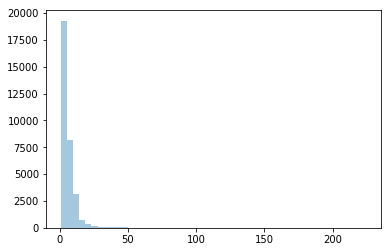

Counter({4.0: 4514,
         2.0: 4210,
         82.0: 1,
         5.0: 3555,
         6.0: 2844,
         1.0: 2280,
         9.0: 1328,
         3.0: 4723,
         7.0: 2306,
         8.0: 1683,
         13.0: 455,
         11.0: 758,
         12.0: 584,
         16.0: 181,
         10.0: 1008,
         167.0: 1,
         63.0: 4,
         19.0: 103,
         17.0: 171,
         29.0: 34,
         66.0: 2,
         14.0: 355,
         48.0: 5,
         24.0: 44,
         18.0: 143,
         21.0: 69,
         43.0: 12,
         15.0: 255,
         27.0: 26,
         73.0: 1,
         23.0: 56,
         22.0: 70,
         96.0: 1,
         33.0: 15,
         50.0: 6,
         91.0: 1,
         39.0: 10,
         54.0: 6,
         25.0: 26,
         142.0: 1,
         89.0: 2,
         36.0: 14,
         31.0: 16,
         77.0: 2,
         20.0: 81,
         49.0: 9,
         101.0: 1,
         26.0: 45,
         122.0: 1,
         37.0: 9,
         123.0: 1,
         30.0: 12,
     

In [8]:
#graph the results with seaborn

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df = sb.load_dataset('iris')
sb.distplot(total_parts,kde = False)
plt.show()



neurite_counter = Counter(total_parts)
neurite_counter

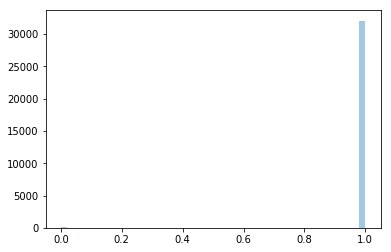

Counter({1.0: 32078, 0.0: 160})

In [9]:
#graph the results with seaborn

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df = sb.load_dataset('iris')
sb.distplot(total_parts_above_threshold,kde = False)
plt.show()



neurite_counter_above_threshold = Counter(total_parts_above_threshold)
neurite_counter_above_threshold

In [13]:
#checking the axon neuron:
ID = 648518346349507130
neurite_neighbors[str(ID)]

[21,
 0,
 25704,
 Counter({0: 10388,
          1: 7561,
          2: 2544,
          3: 425,
          4: 923,
          5: 1845,
          6: 115,
          7: 1458,
          8: 113,
          9: 242,
          10: 30,
          11: 7,
          12: 5,
          13: 3,
          14: 11,
          15: 5,
          16: 3,
          17: 3,
          18: 7,
          19: 13,
          20: 3})]

In [16]:
#checking the axon neuron:
ID = 648518346349507130
neurite_neighbors[str(ID)]
threshold = neurite_neighbors[str(ID)][2]*0.05
print(threshold)

myCounter = neurite_neighbors[str(ID)][3]
total_neighbors_threshold = len([x for x in myCounter.values() if x > threshold])
print(total_neighbors_threshold)



1285.2
5


In [36]:
for i,(k,n) in enumerate(neurite_neighbors.items()):
    if i > 100 and i < 200:
        print(k,n)

648518346341352620 [2, 1, 20530, Counter({0: 20525, 1: 5})]
648518346341352621 [3, 1, 33077, Counter({0: 33068, 1: 5, 2: 4})]
648518346341352629 [3, 1, 12397, Counter({0: 12387, 1: 5, 2: 5})]
648518346341352643 [4, 1, 28592, Counter({0: 28558, 2: 24, 1: 5, 3: 5})]
648518346341352671 [7, 1, 25008, Counter({0: 24971, 6: 12, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5})]
648518346341352672 [4, 1, 15342, Counter({0: 15315, 3: 21, 1: 3, 2: 3})]
648518346341352679 [12, 1, 48880, Counter({0: 48823, 9: 7, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 10: 5, 11: 5})]
648518346341352730 [3, 1, 22410, Counter({0: 22400, 1: 5, 2: 5})]
648518346341352744 [3, 1, 29086, Counter({0: 29072, 1: 9, 2: 5})]
648518346341352747 [3, 1, 20565, Counter({0: 20555, 1: 5, 2: 5})]
648518346341352768 [4, 1, 26990, Counter({0: 26963, 2: 19, 3: 5, 1: 3})]
648518346341352770 [10, 1, 57442, Counter({0: 57323, 1: 50, 3: 22, 4: 15, 9: 11, 2: 5, 6: 5, 8: 5, 5: 3, 7: 3})]
648518346341352771 [5, 1, 18859, Counter({0: 18821, 2: 13, 3: 11

In [32]:
#loop that will calculate the actual distribution
#threshold percentage using
threshold_size = 0.99
threshold_array = [0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
counter_threshold = dict()

for threshold_size in threshold_array:
    actual_neurite_neighbors = dict()
    actual_total_parts = np.ones(len(neurite_neighbors))
    actual_total_parts_above_threshold = np.ones(len(neurite_neighbors))
    for i,(k,n) in tqdm(enumerate(neurite_neighbors.items())):
        actual_total_parts[i] = n[0]

        #calculate the actual threshold
        size = n[2]
        threshold = threshold_size*size

        #get the counter
        myCounter = n[3]
        total_neighbors_threshold = len([x for x in myCounter.values() if x > threshold])
        actual_total_parts_above_threshold[i] = total_neighbors_threshold

        #store all the values in the new dictionary: total, number above threshold, size, counter
        actual_neurite_neighbors[str(k)] = [actual_total_parts[i],total_neighbors_threshold,size,myCounter]
    
    counter_threshold[str(threshold_size)] = Counter(actual_total_parts_above_threshold)
    
    


    

32238it [00:00, 177179.76it/s]
32238it [00:00, 290207.87it/s]
32238it [00:00, 91092.07it/s]
32238it [00:00, 268668.94it/s]
32238it [00:00, 288295.91it/s]
32238it [00:00, 110773.93it/s]
32238it [00:00, 354552.32it/s]
32238it [00:00, 398910.71it/s]
32238it [00:00, 402445.26it/s]
32238it [00:00, 92486.80it/s]


In [33]:
counter_threshold

{'0.9': Counter({1.0: 32078, 0.0: 160}),
 '0.91': Counter({1.0: 32073, 0.0: 165}),
 '0.92': Counter({1.0: 32066, 0.0: 172}),
 '0.93': Counter({1.0: 32061, 0.0: 177}),
 '0.94': Counter({1.0: 32055, 0.0: 183}),
 '0.95': Counter({1.0: 32048, 0.0: 190}),
 '0.96': Counter({1.0: 32029, 0.0: 209}),
 '0.97': Counter({1.0: 31983, 0.0: 255}),
 '0.98': Counter({1.0: 31878, 0.0: 360}),
 '0.99': Counter({1.0: 31196, 0.0: 1042})}

In [ ]:
[x for x in myCounter.values() if x > threshold]

In [28]:
#checking that working correctly
for i,(k,n) in tqdm(enumerate(neurite_neighbors.items())):
    if k == "648518346349507130":
        actual_total_parts[i] = n[0]
        print("actual_total_parts[i] =" + str(actual_total_parts[i]))

        #calculate the actual threshold
        size = n[2]
        print("size =" + str(size))

        threshold = threshold_size*size
        print("threshold = " + str(threshold))

        #get the counter
        myCounter = n[3]
        print('myCounter = ' + str(myCounter))
        print("myConter list = " + str([x for x in myCounter.values() if x > threshold]))

        total_neighbors_threshold = len([x for x in myCounter.values() if x > threshold])
        actual_total_parts_above_threshold[i] = total_neighbors_threshold

        #store all the values in the new dictionary: total, number above threshold, size, counter
        actual_neurite_neighbors[str(k)] = [actual_total_parts[i],total_neighbors_threshold,size,myCounter]


32238it [00:00, 1053970.41it/s]

actual_total_parts[i] =21.0
size =25704
threshold = 2570.4
myCounter = Counter({0: 10388, 1: 7561, 2: 2544, 5: 1845, 7: 1458, 4: 923, 3: 425, 9: 242, 6: 115, 8: 113, 10: 30, 19: 13, 14: 11, 11: 7, 18: 7, 12: 5, 15: 5, 13: 3, 16: 3, 17: 3, 20: 3})
myConter list = [10388, 7561]


In [29]:
#checking the axon neuron:
ID = 648518346349507130
print(actual_neurite_neighbors[str(ID)])
threshold = actual_neurite_neighbors[str(ID)][2]*0.1
print(threshold)
print(actual_neurite_neighbors[str(ID)][1])

myCounter = actual_neurite_neighbors[str(ID)][3]
total_neighbors_threshold = len([x for x in myCounter.values() if x > threshold])
print(total_neighbors_threshold)

[21.0, 2, 25704, Counter({0: 10388, 1: 7561, 2: 2544, 5: 1845, 7: 1458, 4: 923, 3: 425, 9: 242, 6: 115, 8: 113, 10: 30, 19: 13, 14: 11, 11: 7, 18: 7, 12: 5, 15: 5, 13: 3, 16: 3, 17: 3, 20: 3})]
2570.4
2
2


In [ ]:
#checking everything went correctly:
#neurite_neighbors["648518346341352004"]

key["segment_id"] = 648518346341352004
mesh_neuron = (ta3p100.Mesh() & key).fetch1()
#store the mesh in a trimesh_object
mesh = trimesh_io.Mesh(vertices=mesh_neuron["vertices"], faces=mesh_neuron["triangles"])

#get the count and labels
count, labels = trimesh_io.trimesh.graph.csgraph.connected_components(
mesh.edges_sparse,
directed=False,
return_labels=True)

#store the number of components
total_neighbors = count
#total_parts[i] = total_neighbors



myCounter = Counter(labels)
total_neighbors_threshold = len([x for x in myCounter.values() if x > threshold])
#total_parts_above_threshold[i] = total_neighbors_threshold

new_dict = dict()
new_dict["648518346341352004"] = [total_neighbors,total_neighbors_threshold,myCounter]
#get the number above a certain threshold
#neurite_neighbors[str(neurite)] = [total_neighbors,total_neighbors_threshold]



In [ ]:
ta3p100.NeuronR